## Reading File 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url="https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv"
dataStates = pd.read_csv(url)

url = "https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities.csv"
dataCities = pd.read_csv(url)

<h2 style='color:#ff335f'> Before removing noisy data </h2>

### dataCities

In [3]:
dataCities.isnull().sum()

country                             0
state                               0
city                                0
ibgeID                              0
cod_RegiaoDeSaude                  26
name_RegiaoDeSaude                 26
deaths                              0
totalCases                          0
deaths_per_100k_inhabitants         0
totalCases_per_100k_inhabitants     0
deaths_by_totalCases                0
_source                             0
date                                0
newCases                            0
newDeaths                           0
last_info_date                      0
dtype: int64

### dataStates

In [4]:
dataStates.isnull().sum()

epi_week                                     0
date                                         0
country                                      0
state                                        0
city                                         0
newDeaths                                    0
deaths                                       0
newCases                                     0
totalCases                                   0
deathsMS                                     0
totalCasesMS                                 0
deaths_per_100k_inhabitants                  0
totalCases_per_100k_inhabitants              0
deaths_by_totalCases                         0
recovered                                  643
suspects                                  2544
tests                                     1344
tests_per_100k_inhabitants                1344
vaccinated                                8731
vaccinated_per_100k_inhabitants           8731
vaccinated_second                         9411
vaccinated_se

<h2 style='color:#ff335f'> Noisy Data </h2>

### dataCities

<span style='color:#3385ff'> **Remove column useless** </span>

In [5]:
del dataCities['name_RegiaoDeSaude']
del dataCities['cod_RegiaoDeSaude']
del dataCities['last_info_date']
del dataCities['_source']
del dataCities['country']

### dataStates

<span style='color:#3385ff'> **Remove column useless** </span>

In [6]:
del dataStates['country']
del dataStates['epi_week']
del dataStates['suspects']
del dataStates['vaccinated_second']
del dataStates['vaccinated_second_per_100k_inhabitants']
del dataStates['tests']
del dataStates['tests_per_100k_inhabitants']

<span style='color:#3385ff'> **Fill Nan values** </span>

In [7]:
dataStates['recovered'].fillna(value=dataStates['recovered'].mean(), inplace=True)

In [8]:
dataStates['vaccinated'].fillna(value=0, inplace=True)
dataStates['vaccinated_per_100k_inhabitants'].fillna(value=0, inplace=True)

 <h3 style='color:#ff335f'> After removing noisy data </h3>

### dataCities

In [9]:
dataCities.isnull().sum()

state                              0
city                               0
ibgeID                             0
deaths                             0
totalCases                         0
deaths_per_100k_inhabitants        0
totalCases_per_100k_inhabitants    0
deaths_by_totalCases               0
date                               0
newCases                           0
newDeaths                          0
dtype: int64

### dataStates

In [10]:
dataStates.isnull().sum()

date                               0
state                              0
city                               0
newDeaths                          0
deaths                             0
newCases                           0
totalCases                         0
deathsMS                           0
totalCasesMS                       0
deaths_per_100k_inhabitants        0
totalCases_per_100k_inhabitants    0
deaths_by_totalCases               0
recovered                          0
vaccinated                         0
vaccinated_per_100k_inhabitants    0
dtype: int64

## Add regions

In [11]:
NORTE = ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO']
NORDESTE = ['MA', 'PI', 'BA', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE']
CENTRO = ['MT', 'GO', 'DF', 'MS']
SUDESTE = ['SP', 'MG', 'ES', 'RJ']
SUL = ['PR', 'SC', 'RS']

def regions(x):
    if x in NORTE:
        return 'NORTE'
    elif x in NORDESTE:
        return 'NORDESTE'
    elif x in CENTRO:
        return 'CENTRO-OESTE'
    elif x in SUL:
        return 'SUL'
    elif x in SUDESTE:
        return 'SUDESTE'

dataStates['regions'] = dataStates['state'].apply(regions)
dataStates

,date,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,vaccinated,vaccinated_per_100k_inhabitants,regions
0,2020-02-25,SP,TOTAL,0,0,1,1,0,0,0.00000,0.00218,0.00000,3.755658e+05,0.0,0.00000,SUDESTE
1,2020-02-25,TOTAL,TOTAL,0,0,1,1,0,0,0.00000,0.00047,0.00000,3.755658e+05,0.0,0.00000,None
2,2020-02-26,SP,TOTAL,0,0,0,1,0,1,0.00000,0.00218,0.00000,3.755658e+05,0.0,0.00000,SUDESTE
3,2020-02-26,TOTAL,TOTAL,0,0,0,1,0,1,0.00000,0.00047,0.00000,3.755658e+05,0.0,0.00000,None
4,2020-02-27,SP,TOTAL,0,0,0,1,0,1,0.00000,0.00218,0.00000,3.755658e+05,0.0,0.00000,SUDESTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12077,2021-05-17,SC,TOTAL,0,14434,0,928160,14434,928160,201.45746,12954.46565,0.01555,8.938520e+05,1319788.0,18420.47525,SUL
12078,2021-05-17,SE,TOTAL,0,4718,0,217503,4718,217503,205.24680,9462.01673,0.02169,1.940810e+05,372659.0,16211.75658,NORDESTE
12079,2021-05-17,SP,TOTAL,0,104219,0,3092844,104219,3092844,226.96245,6735.42695,0.03370,2.769019e+06,9671714.0,21062.53115,SUDESTE
12080,2021-05-17,TO,TOTAL,0,2720,0,168518,2720,168518,172.93272,10714.07227,0.01614,1.493950e+05,215627.0,13709.17802,NORTE


## Data Visualization 

In [12]:
estados = dataStates.groupby('state')
estados.size()

state
AC       427
AL       436
AM       431
AP       424
BA       438
CE       428
DF       437
ES       438
GO       432
MA       424
MG       436
MS       430
MT       424
PA       426
PB       426
PE       432
PI       425
PR       432
RJ       439
RN       432
RO       424
RR       423
RS       434
SC       432
SE       430
SP       448
TO       426
TOTAL    448
dtype: int64

<AxesSubplot:xlabel='state'>

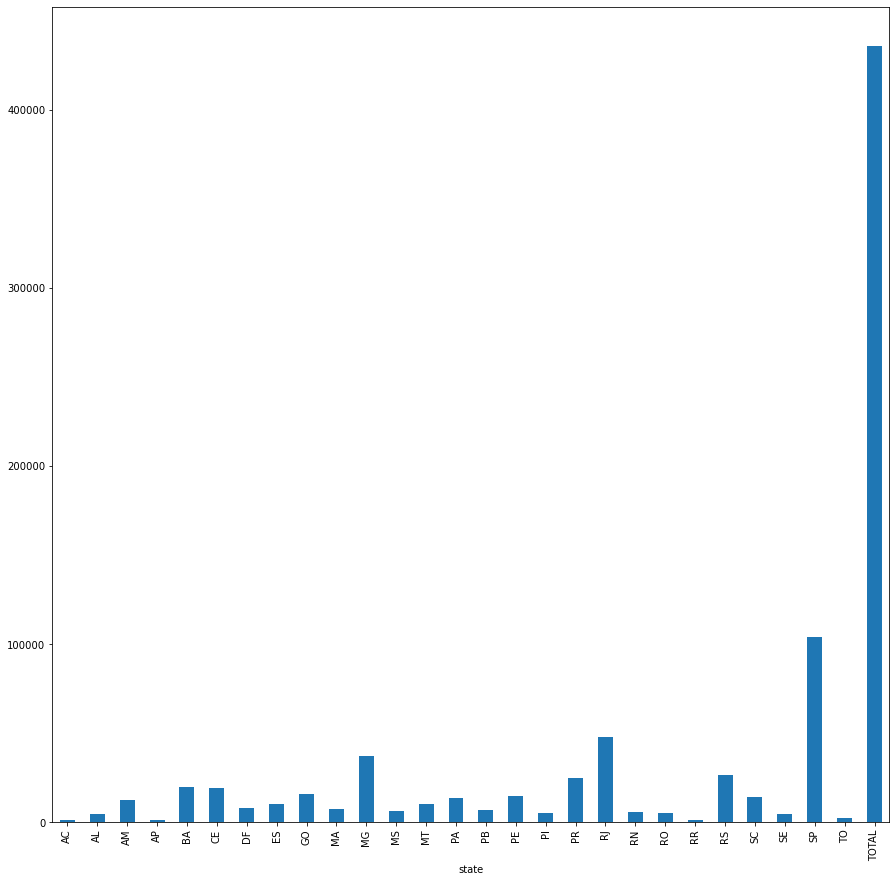

In [13]:
a = estados['deaths'].max()
a.plot.bar(figsize=(15,15))

<AxesSubplot:xlabel='state'>

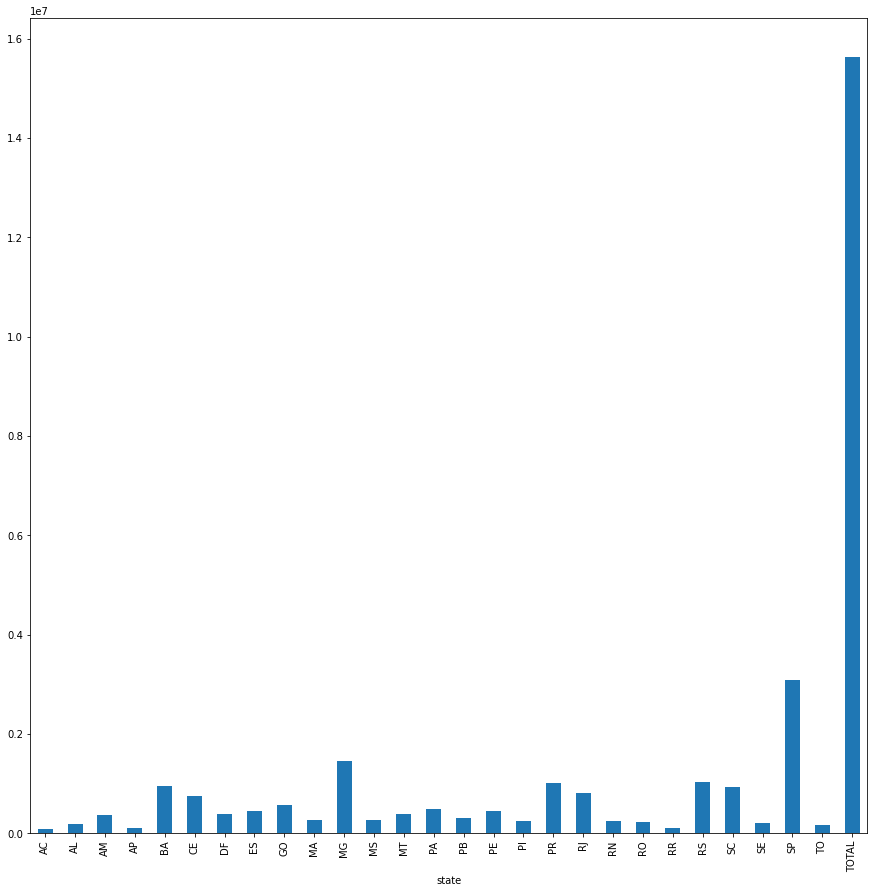

In [14]:
a = estados['totalCases'].max()
a.plot.bar(figsize=(15,15))

## Alagoas 

In [15]:
alagoas = dataCities[dataCities['state'] == 'AL']

### Número de obitos acumulados em Alagoas

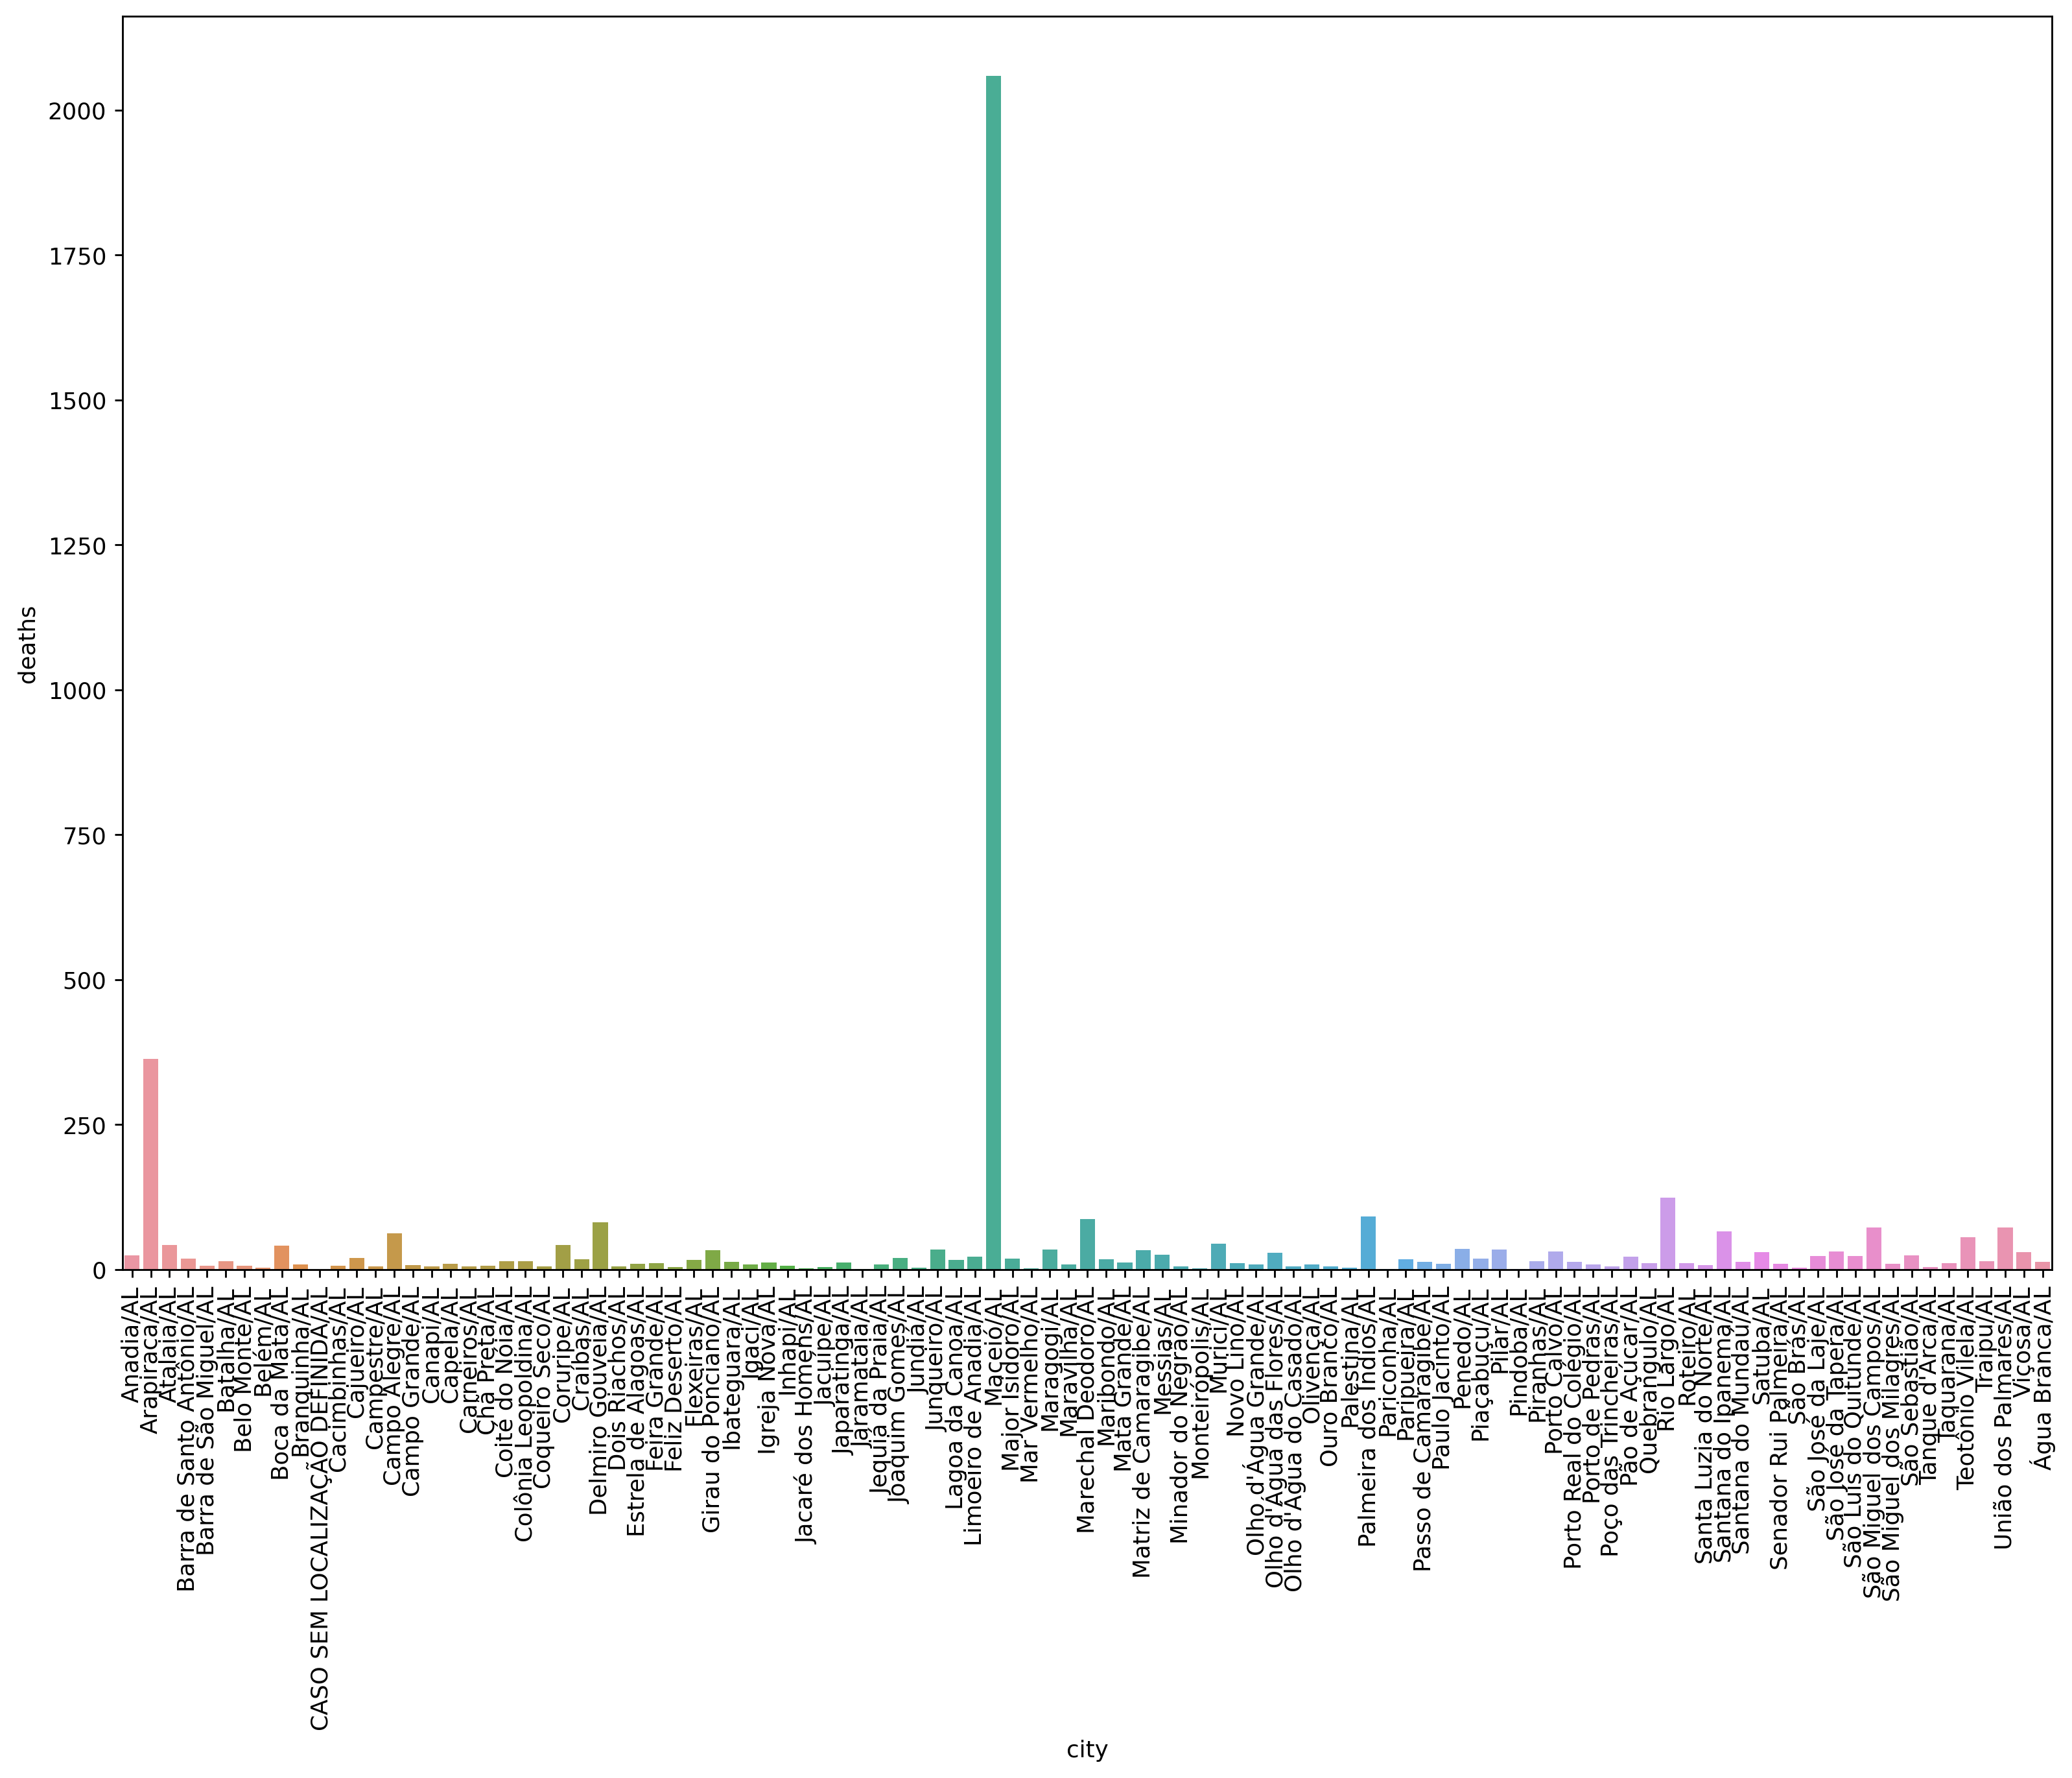

In [16]:
temp = alagoas[alagoas['date'] == "2021-05-17"]

plt.figure(figsize=(15,10), dpi=256)
sns.barplot(x='city',y='deaths',data=temp)
plt.xticks(rotation=90)
plt.show()

### Casos Acumulados em alagoas 

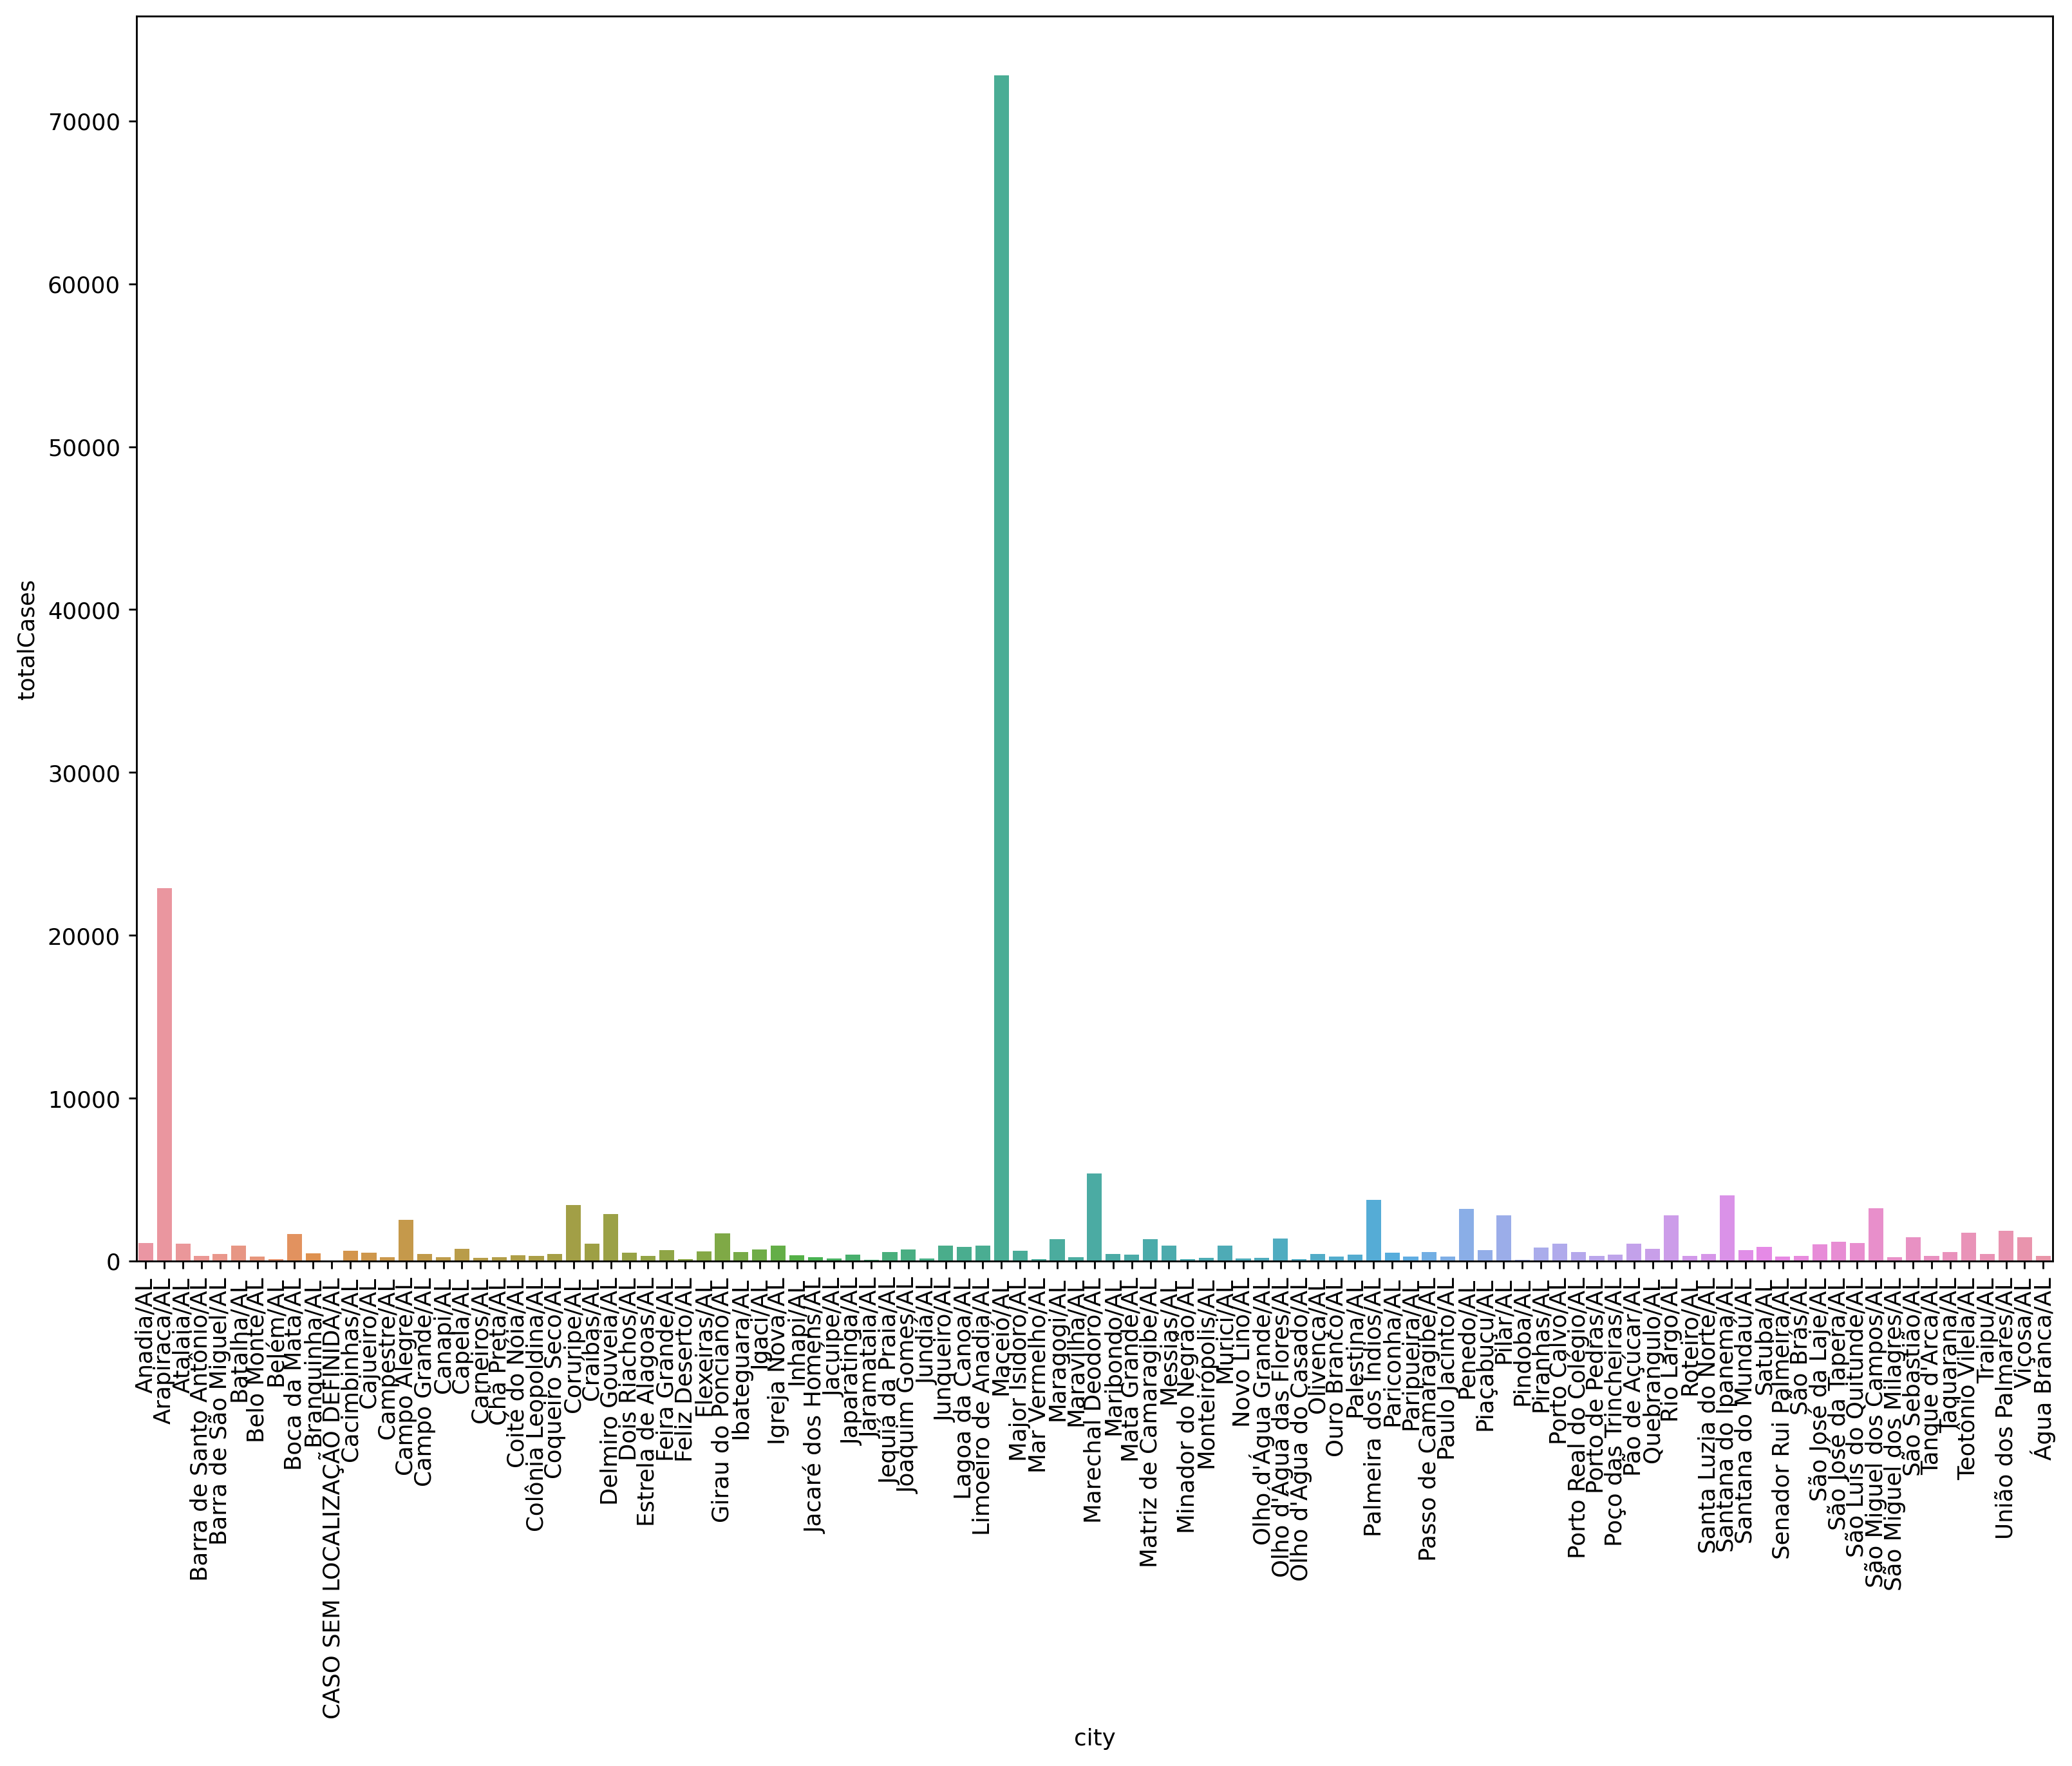

In [17]:
plt.figure(figsize=(15,10), dpi=256)
sns.barplot(x='city',y='totalCases',data=alagoas)
plt.xticks(rotation=90)
plt.show()

## Data Analyzing

In [18]:
# dataFrame.reset_index(inplace=True)
dataStates.sort_values(by='totalCases', axis=0, inplace=True, ascending=False)

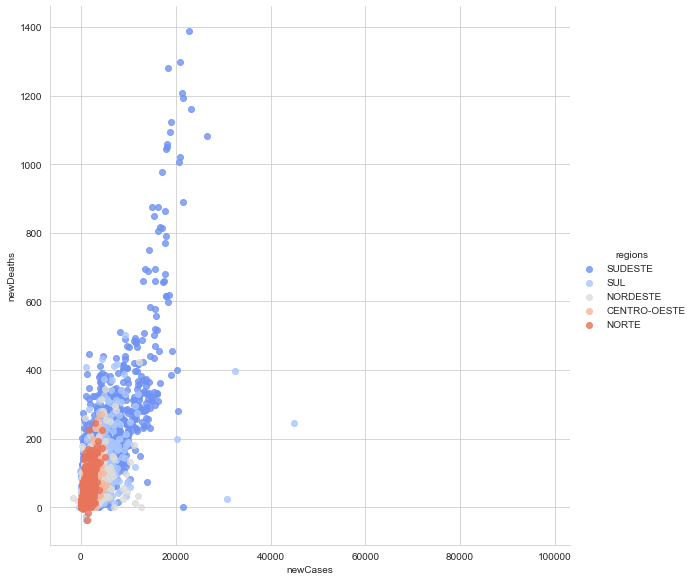

In [19]:
sns.set_style('whitegrid')
sns.lmplot(x='newCases', y='newDeaths', data=dataStates, hue='regions', fit_reg=False, height=8, palette='coolwarm')

In [20]:
def data(x):
    if x < 0:
        return 0
    return x

dataStates['newDeaths'] = dataStates['newDeaths'].apply(data) 
dataStates['newCases'] = dataStates['newCases'].apply(data) 

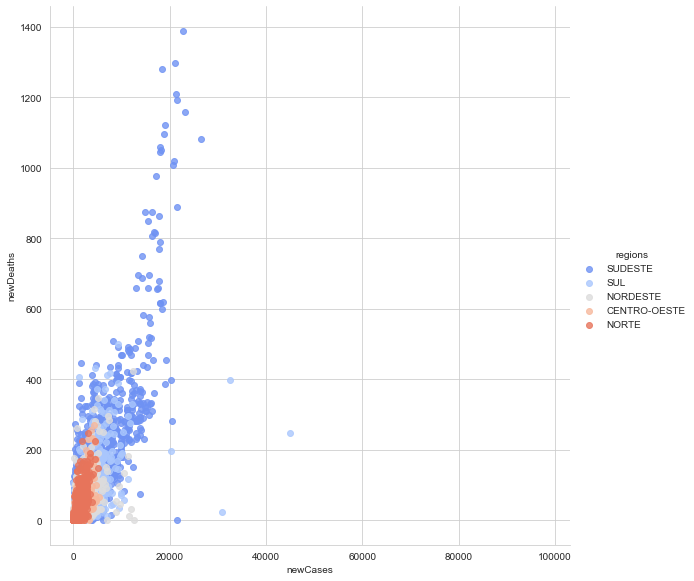

In [21]:
sns.set_style('whitegrid')
sns.lmplot(x='newCases', y='newDeaths', data=dataStates, hue='regions', fit_reg=False, height=8, palette='coolwarm')

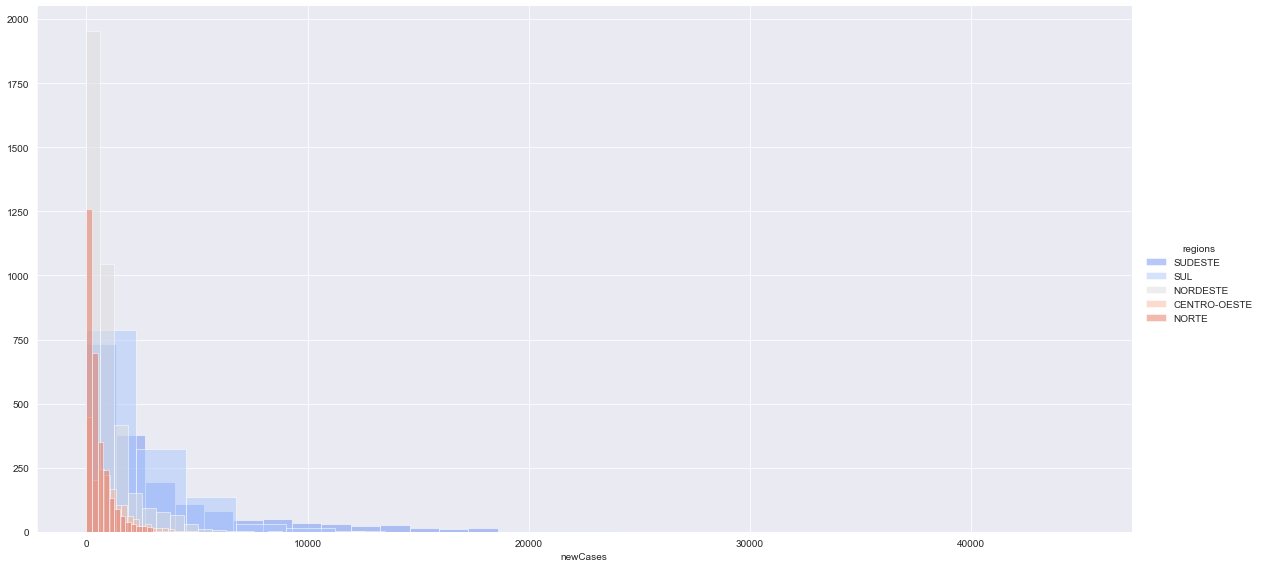

In [34]:
sns.set_style('darkgrid')
dg = sns.FacetGrid(dataStates, hue="regions", height=8, palette='coolwarm', aspect=2)
dg = dg.map(plt.hist, 'newCases', bins=20, alpha=0.5)
dg.add_legend()

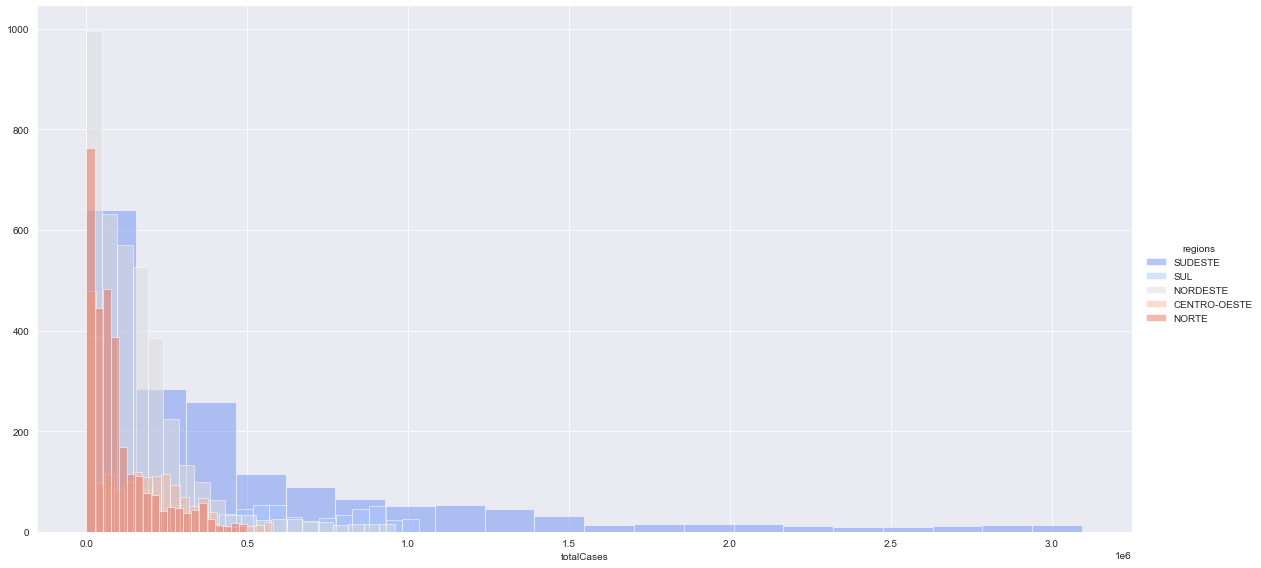

In [35]:
sns.set_style('darkgrid')
dg = sns.FacetGrid(dataStates, hue="regions", height=8, palette='coolwarm', aspect=2)
dg = dg.map(plt.hist, 'totalCases', bins=20, alpha=0.5)
dg.add_legend()

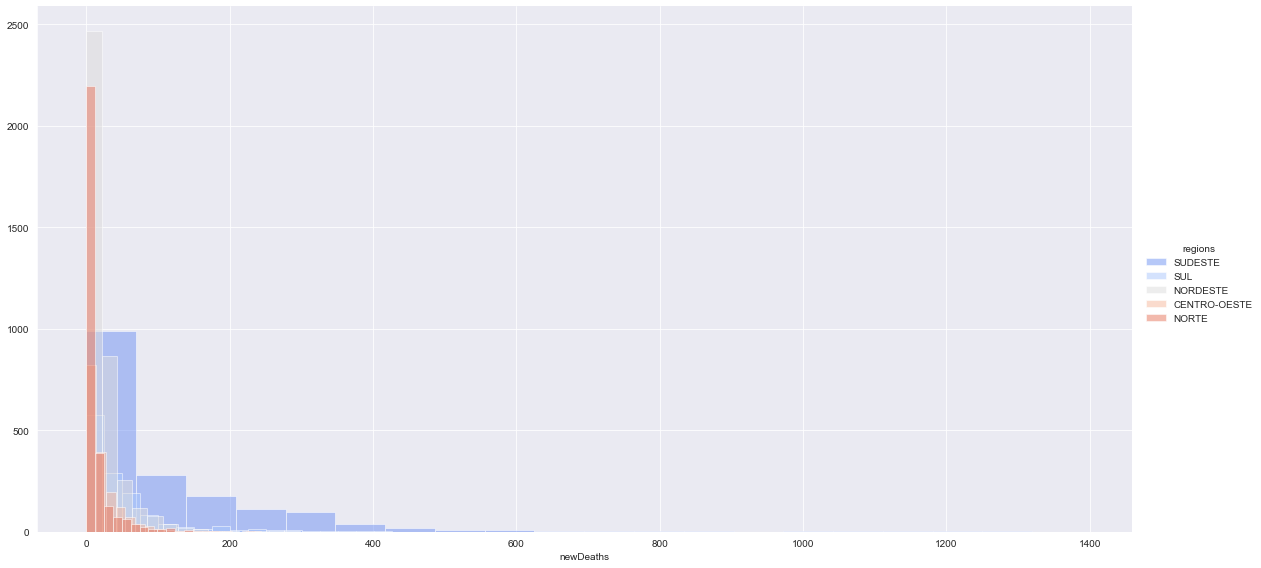

In [32]:
sns.set_style('darkgrid')
dg = sns.FacetGrid(dataStates, hue="regions", height=8, palette='coolwarm', aspect=2)
dg = dg.map(plt.hist, 'newDeaths', bins=20, alpha=0.5)
dg.add_legend()

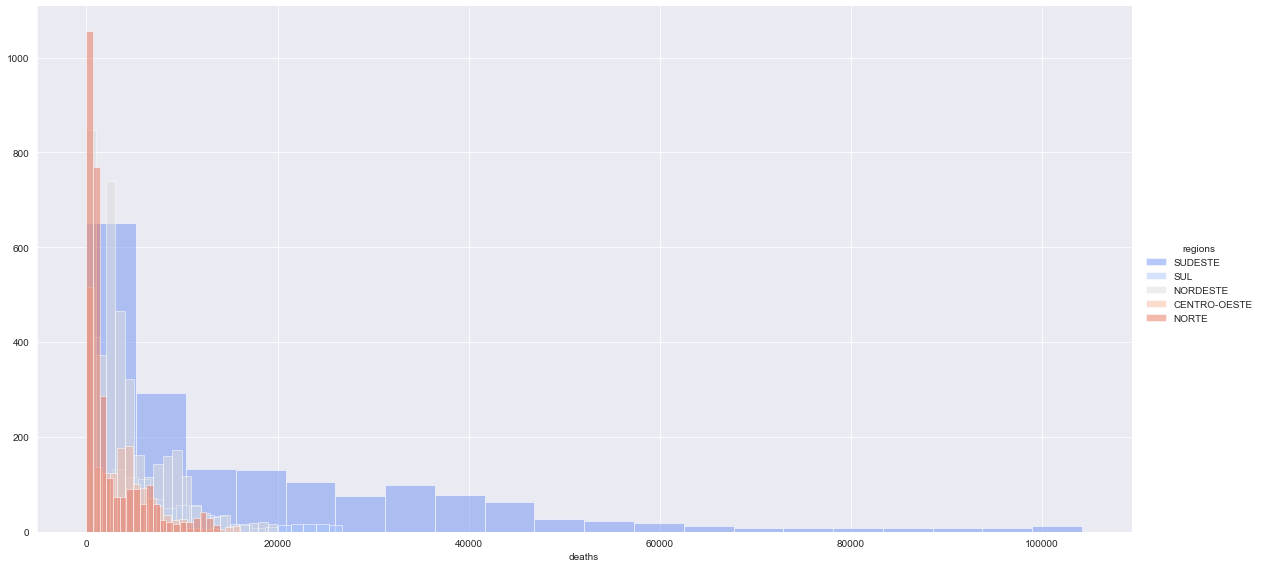

In [33]:
sns.set_style('darkgrid')
dg = sns.FacetGrid(dataStates, hue="regions", height=8, palette='coolwarm', aspect=2)
dg = dg.map(plt.hist, 'deaths', bins=20, alpha=0.5)
dg.add_legend()

# K Means 

In [24]:
from sklearn.cluster import KMeans

In [76]:
X2 = dataCities[['totalCases','deaths']].iloc[:][:].values
inertia = []

for n in range(1, 11):
    algorithm = (KMeans(n_clusters=n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

(Text(0.5, 0, 'Número de Clusters'),
 Text(0, 0.5, 'Soma das distâncias Q intra Clusters'))

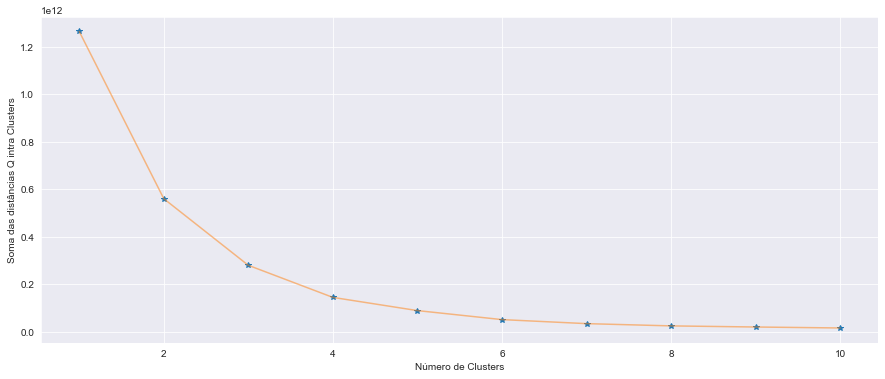

In [77]:
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia, '*')
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)
plt.xlabel('Número de Clusters'), plt.ylabel('Soma das distâncias Q intra Clusters')

In [83]:
algorithm = KMeans(n_clusters=3)

In [84]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X2 = st.fit_transform(X2)

In [85]:
algorithm.fit(X2)

KMeans(n_clusters=3)

In [86]:
algorithm.cluster_centers_

array([[-0.05045249, -0.04528891],
       [34.98515847, 44.82369076],
       [ 7.26889012,  5.59949582]])

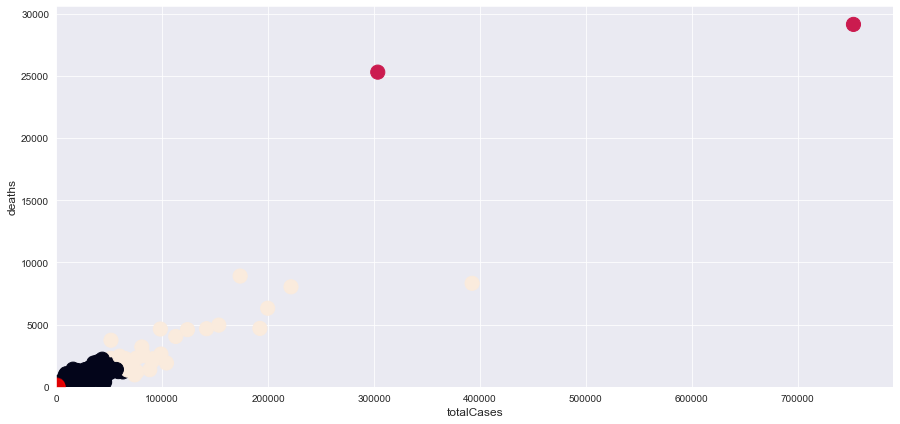

In [87]:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7))
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x ='totalCases' ,y = 'deaths' , data = dataCities , c = labels2 , s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red',alpha=0.5)
plt.xlabel('totalCases',fontsize=12)
plt.ylabel('deaths',fontsize=12)
plt.show()

In [90]:
dataCities['clusters'] = algorithm.labels_
df_groupy = dataCities.groupby('clusters')
df_groupy.describe()

ibgeID                                                     \
           count          mean           std        min         25%   
clusters                                                              
0         5565.0  3.238342e+06  1.006632e+06       11.0  2510501.00   
1            2.0  3.427432e+06  1.737722e+05  3304557.0  3365994.75   
2           29.0  3.250845e+06  1.164920e+06  1100205.0  2507507.00   

                                            deaths                ...  \
                50%         75%        max   count          mean  ...   
clusters                                                          ...   
0         3145307.0  4118808.00  5222302.0  5565.0     50.525427  ...   
1         3427432.5  3488870.25  3550308.0     2.0  27207.500000  ...   
2         3509502.0  4106902.00  5300108.0    29.0   3467.034483  ...   

         newCases         newDeaths                                         \
              75%     max     count     mean       std  min  25%  50%  75%   
clusters                                                                     
0             0.0  1917.0    5565.0  0.02372  1.186043  0.0  0.0  0.0  0.0   
1             0.0     0.0       2.0  0.00000  0.000000  0.0  0.0  0.0  0.0   
2             0.0     0.0      29.0  0.00000  0.000000  0.0  0.0  0.0  0.0   

                
           max  
clusters        
0         78.0  
1          0.0  
2          0.0  

[3 rows x 64 columns]

In [ ]:
df_groupy['obitosNovos'].describe()

In [ ]:
# plt.scatter(X[:,0], X[:,1], s = 100, c=kmeans.labels_)
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c="red", label="Centroids")